<font size = 7.0 color ='336EFF'>AR1 and Simple Random Walk</font>



---

## **Time Series: Auto-Regressive Process of Order 1**



---



Consider the following random process in discrete time:

$X_0=Z_0\\X_n=aX_{n-1}+Z_n$ \
Where $n=\{1,2,3,\cdots\}$ and $Z_n \sim N(0,r)$

- $X_n$ is the value of the process over time $n$.
- $a$ is the autoregressive coefficient.
- $Z_n$ It is a Gaussian white noise with mean 0 and variance $r$.

It is a simple but widely used model in time series, as it can describe many processes in nature, economics and other fields, where the current value of a series depends on its previous value plus a noise or disturbance term.


---



### 1) Write the values $E[X_t], Var[X_t], Cov[X_t,X_t']$ that we calculate in class. You do NOT have to repeat the procedure, just indicate the general idea. Is the process stationary in the weak sense?

---

1. $E[x_n] = 0$
2. $\text{Var}[x_n] = \frac{r^2}{1 - a^2}$
3. $\text{Cov}[x_n, x_{n'}] = \frac{a^{|n-n'|} \times r^2}{1 - a^2}$

A stationary process in the weak sense must satisfy these three conditions:

1. The $E[X_t]$ is constant over time.
2. The variance $\text{Var}[X_t]$ is constant over time.
3. The covariance between $X_t$ and $X_{t+k}$, $\text{Cov}[X_t, X_{t+k}]$, only depends on the difference $k$ and not on time $t$ itself.

From the given conditions:

1. $E[x_n] = 0$: This indicates that the mean is constant over time and is equal to 0.
2. $\text{Var}[x_n] = \frac{r^2}{1 - a^2}$: This indicates that the variance is constant over time and is equal to $\frac{r^2}{1 - a^2}$.
3. $\text{Cov}[x_n, x_{n'}] = \frac{a^{|n-n'|} \times r^2}{1 - a^2}$: This indicates that the covariance between $x_n$ and $x_{n'}$ only depends on the difference $|n-n'|$, in other words it only depends on the lag (and not on the particular times).

Since all three conditions are met, *we can conclude that the process is stationary in the weak sense.*

### 2) Simulate this process with $M=10,000$ realizations, $a=0.5$ and $r=1$. Show a graph with some sample paths.

---

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
M = 10000
N = 51  # length of each embodiment
a = 0.5
r = 1

X = np.zeros((M, N))
Z = np.random.normal(0, r, (M, N))

# Simulation of our X_n
for t in range(1, N):
    X[:, t] = a * X[:, t - 1] + Z[:, t]

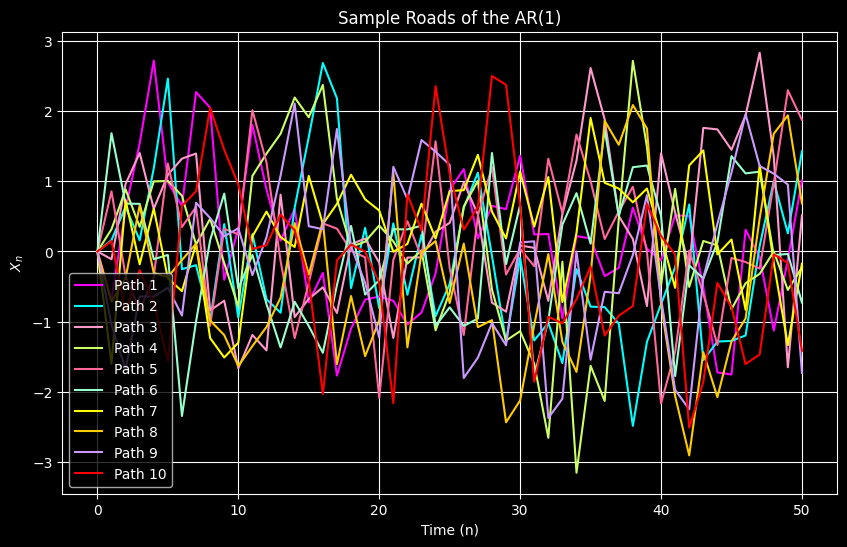

In [42]:
fig = plt.figure(figsize = (10, 6), facecolor = 'black')
ax = fig.add_subplot(111)

neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00', '#ffcc00', '#cc99ff', '#ff0000']

for i in range(10):

    ax.plot(X[i, :], label = f"Path {i + 1}", color = neon_colors[i])

ax.set_title("Sample Roads of the AR(1)")
ax.set_xlabel("Time (n)")
ax.set_ylabel("$X_n$")
ax.legend()
ax.grid(True)
ax.set_facecolor('black')
plt.show()

### 3) Calculate histograms for some time steps.

---

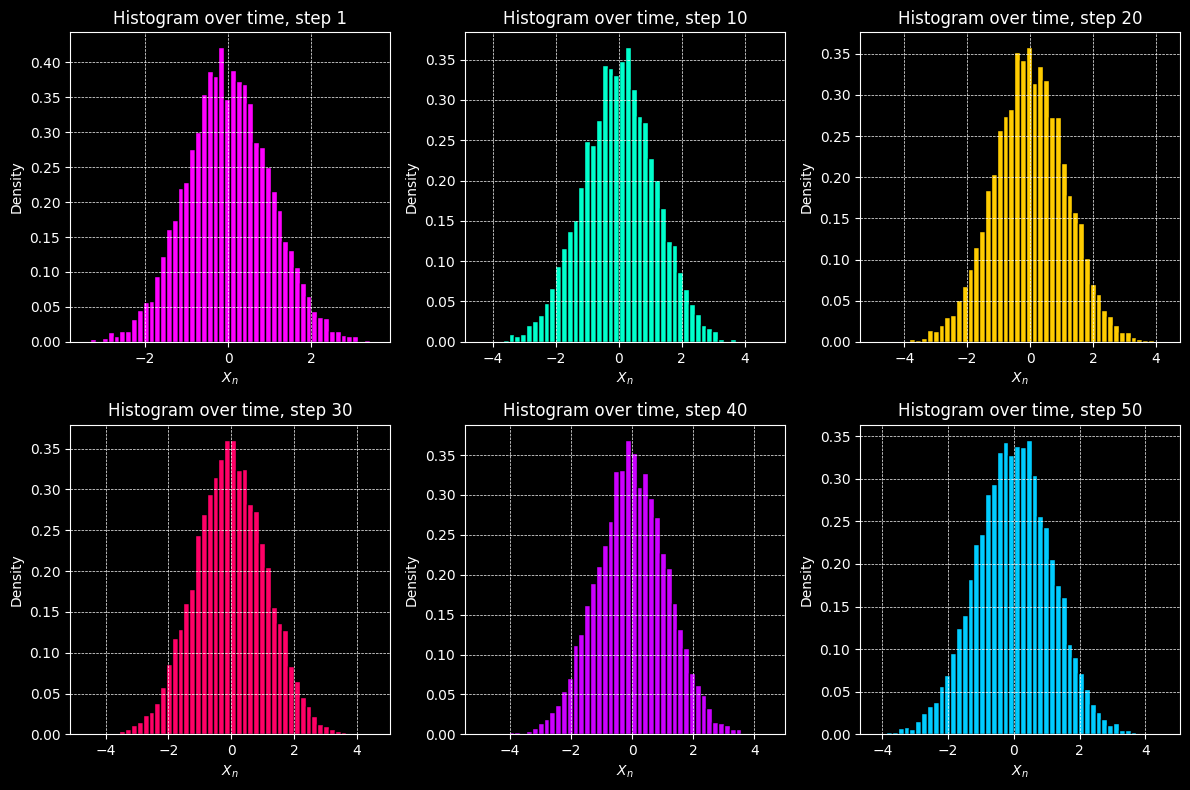

In [43]:
steps = [1, 10, 20, 30, 40, 50] # Selected time steps to display histograms

plt.figure(figsize = (12, 8))
plt.style.use('dark_background')

neon_colors = ['#ff00ff', '#00ffcc', '#ffcc00', '#ff0066', '#cc00ff', '#00ccff']

for i, step in enumerate(steps):
    plt.subplot(2, 3, i + 1)
    plt.hist(X[:, step], bins = 50, density = True, color = neon_colors[i], edgecolor = 'black')
    plt.title(f"Histogram over time, step {step}")
    plt.xlabel("$X_n$")
    plt.ylabel("Density")
    plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.tight_layout()
plt.show()

### 4) Calculate the sample estimators of: $E[X_t], Var[X_t], Cov[X_t,X_t']$ and compare them with those in point (1).

---

1. Theory: $E[x_t] = 0$


In [45]:
E_X_t = X.mean(axis = 0)
E_X_t

array([ 0.        ,  0.0022402 ,  0.0067381 ,  0.00149835, -0.00958167,
       -0.00439441, -0.00034796,  0.00821889,  0.01085105,  0.01778822,
        0.00268117,  0.01781719,  0.00775379, -0.00581054, -0.01326442,
       -0.0056002 , -0.00482413, -0.00812886, -0.00859092, -0.00995049,
       -0.01497659,  0.00520106,  0.02927741,  0.00858716,  0.00461966,
        0.01079271,  0.01071682, -0.00728726, -0.01381832, -0.0206279 ,
       -0.02195043, -0.00526987, -0.01487911, -0.02692278, -0.00374861,
        0.00253884, -0.0142166 , -0.02340862, -0.00291456, -0.00158124,
       -0.00582948,  0.0044956 , -0.0176465 , -0.00295209, -0.00983378,
       -0.00708199, -0.00331948, -0.000169  , -0.00470457, -0.0202754 ,
       -0.00850532])

In our simulations, we see that the sample estimators of $E[X_t]$ for each $t$ are close to 0. This is expected, since the AR(1) process has a constant mean that is 0. The small variation that We observe in the estimated values ​​is due to noise in the simulations and the finite number of samples (M = 10,000) that we used.

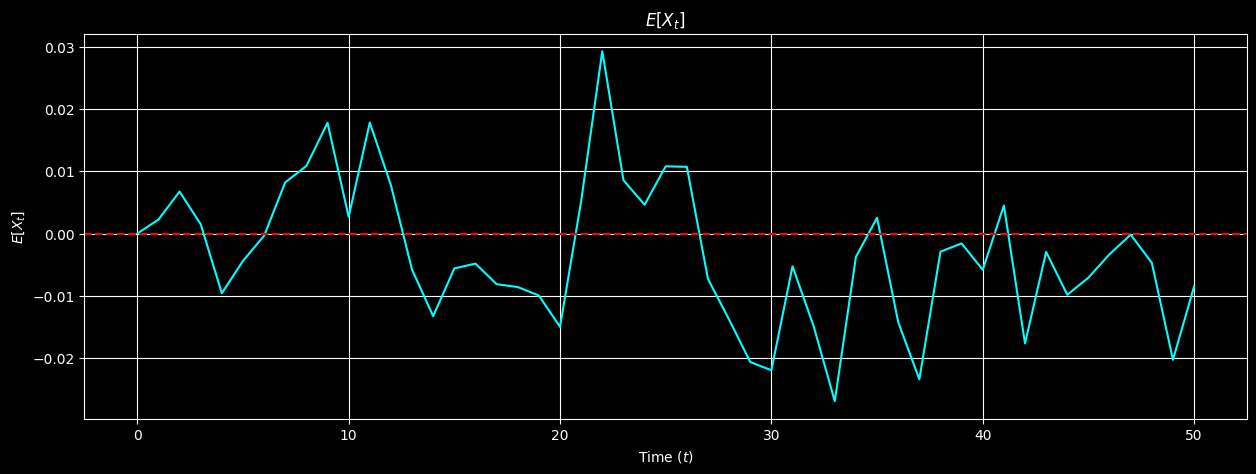

In [46]:
plt.figure(figsize = (15, 5))
plt.plot(E_X_t, color = 'cyan')
plt.axhline(0, color = 'red', linestyle = '--')
plt.title("$E[X_t]$")
plt.xlabel("Time ($t$)")
plt.ylabel("$E[X_t]$")
plt.grid(True)
plt.show()

2. Theory: $\text{Var}[x_t] = \frac{r^2}{1 - a^2}$

In [47]:
Var_X_t = X.var(axis = 0)
Var_X_t

array([0.        , 1.02568972, 1.27282004, 1.32659431, 1.31929716,
       1.32161274, 1.3195435 , 1.33103377, 1.37720187, 1.35996827,
       1.34593398, 1.30281587, 1.33086833, 1.32207813, 1.34191962,
       1.33910295, 1.3411413 , 1.32286978, 1.34873806, 1.34107267,
       1.34327789, 1.31369609, 1.32888537, 1.33166939, 1.33292109,
       1.33584422, 1.35411816, 1.33220606, 1.33819315, 1.31770765,
       1.31039689, 1.3437855 , 1.3230524 , 1.33840567, 1.31533955,
       1.30560856, 1.33024505, 1.31780321, 1.34625452, 1.32303904,
       1.35757761, 1.36502615, 1.31991409, 1.31841663, 1.33282526,
       1.33825669, 1.32190469, 1.32312089, 1.34753076, 1.33997816,
       1.32695505])

**For  $a=0.5$ and $r=1$**

Substituting with theory $\text{Var}[X_t] = \frac{1^2}{1 - 0.5^2} = 1.33333$.

In the simulations, we observe that the estimators for each $t$ converge towards 1.33333 as $t$ increases. This is an indication that our simulations are consistent with theory. Again, any small variation is due to the stochastic or noisy nature of the simulation.

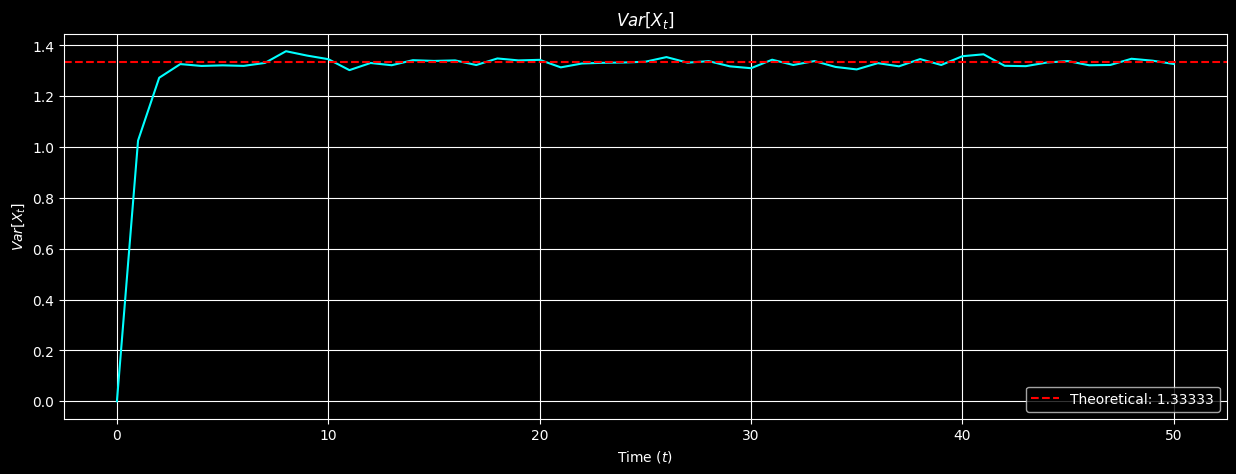

In [48]:
plt.figure(figsize = (15, 5))
plt.plot(Var_X_t, color = 'cyan')
plt.axhline(1.33333, color = 'red', linestyle='--', label = "Theoretical: 1.33333")
plt.title("$Var[X_t]$")
plt.xlabel("Time ($t$)")
plt.ylabel("$Var[X_t]$")
plt.legend()
plt.grid(True)
plt.show()

3. Theory: $Cov[X_t,X_t'] = \frac{a^{|t-t'|} \times r^2}{1 - a^2}$











Referring to the following formula:

$\text{Cov}(X, Y) = E[XY] - E[X]E[Y]$


$Cov[X_t,X_t'] = E[X_tX_t'] - E[X_t]E[X_t']$

Or you can also do it with:

```
np.cov(X, rowvar = False)
```



In [49]:
Cov_Xt_y_Xtprima = np.zeros((N, N)) # 51x51

for t in range(N):
    for t_prima in range(N):
        Cov_Xt_y_Xtprima[t, t_prima] = np.mean(X[:, t] * X[:, t_prima]) - np.mean(X[:, t]) * np.mean(X[:, t_prima])

Cov_Xt_y_Xtprima

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.02568972,  0.51393087, ..., -0.00929419,
        -0.01213679, -0.01408179],
       [ 0.        ,  0.51393087,  1.27282004, ..., -0.01575724,
        -0.01197044, -0.01445537],
       ...,
       [ 0.        , -0.00929419, -0.01575724, ...,  1.34753076,
         0.68290648,  0.35131861],
       [ 0.        , -0.01213679, -0.01197044, ...,  0.68290648,
         1.33997816,  0.67154614],
       [ 0.        , -0.01408179, -0.01445537, ...,  0.35131861,
         0.67154614,  1.32695505]])

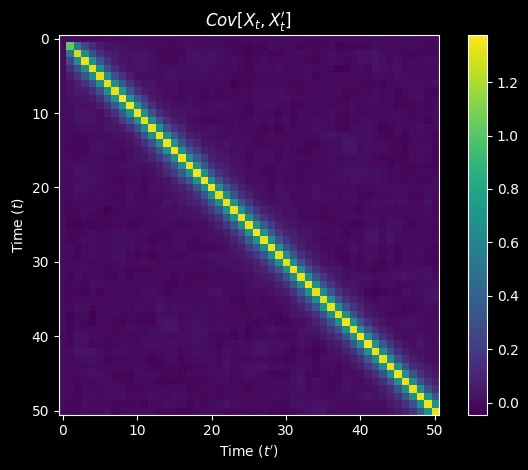

In [50]:
plt.imshow(Cov_Xt_y_Xtprima, cmap = 'viridis')
plt.colorbar()
plt.title("$Cov[X_t, X_t']$")
plt.xlabel("Time ($t'$)")
plt.ylabel("Time ($t$)")
plt.tight_layout()
plt.show()

As a result, it gives us a Toeplitz Matrix.

### 5) Repeat the previous steps with $a=1$. Note: this process is no longer stationary, so be careful how long you simulate it, as it can cause your computer to die from overflow.

---

### Step 1.

The process becomes a random walk. Which means that the value at time $t$ is simply the value at time $t-1$ plus some noise. The effects of shocks accumulate over time.

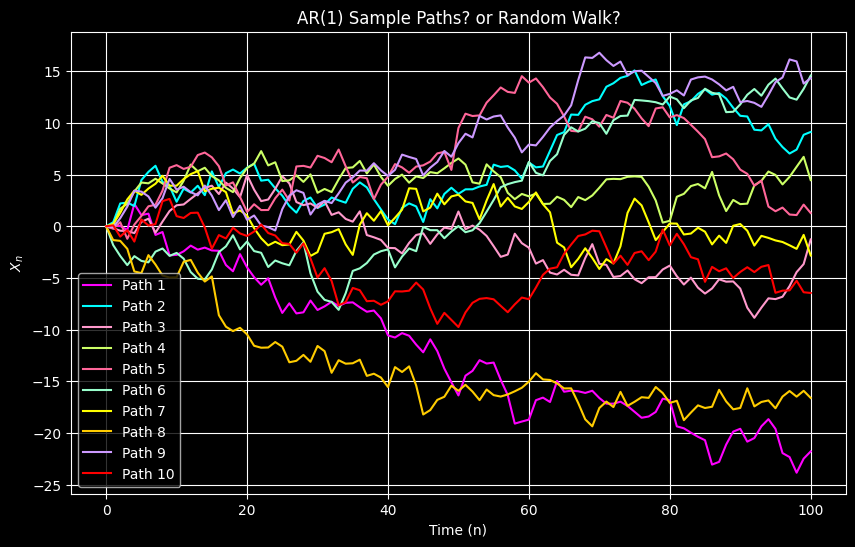

In [51]:
M = 10000
N = 101  # length of each realization, I increased it to 100 so that the mess that is made is more noticeable hehe
a = 1
r = 1

X = np.zeros((M, N))
Z = np.random.normal(0, r, (M, N))

# Simulation of our X_n
for t in range(1, N):
    X[:, t] = a * X[:, t - 1] + Z[:, t]

fig = plt.figure(figsize = (10, 6), facecolor = 'black')
ax = fig.add_subplot(111)

neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00', '#ffcc00', '#cc99ff', '#ff0000']

for i in range(10):

    ax.plot(X[i, :], label = f"Path {i + 1}", color = neon_colors[i])

ax.set_title("AR(1) Sample Paths? or Random Walk?")
ax.set_xlabel("Time (n)")
ax.set_ylabel("$X_n$")
ax.legend()
ax.grid(True)
ax.set_facecolor('black')
plt.show()

### Step 2.

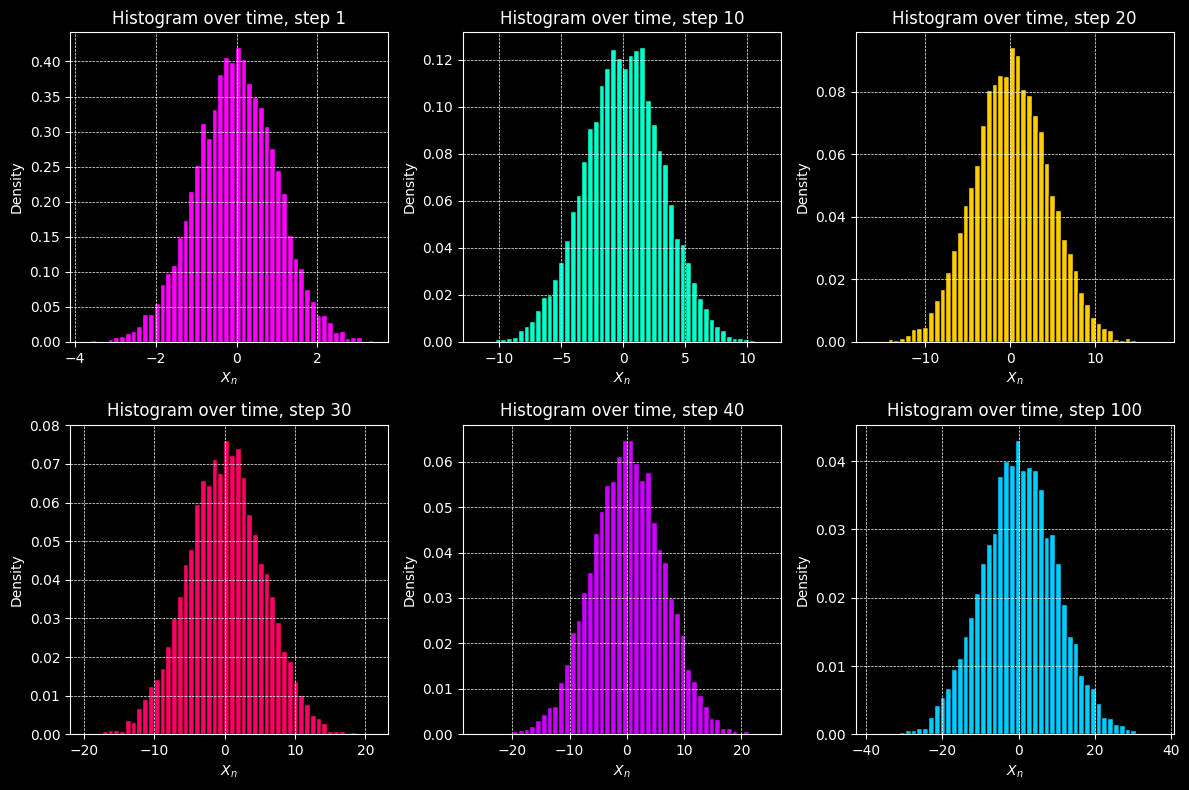

In [52]:
steps = [1, 10, 20, 30, 40, 100] # Selected time steps to display histograms

plt.figure(figsize = (12, 8))
plt.style.use('dark_background')

neon_colors = ['#ff00ff', '#00ffcc', '#ffcc00', '#ff0066', '#cc00ff', '#00ccff']

for i, step in enumerate(steps):
    plt.subplot(2, 3, i + 1)
    plt.hist(X[:, step], bins = 50, density = True, color = neon_colors[i], edgecolor = 'black')
    plt.title(f"Histogram over time, step {step}")
    plt.xlabel("$X_n$")
    plt.ylabel("Density")
    plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.tight_layout()
plt.show()

Of course, the distribution of each step in time remains the same, tending towards Normal.

### Step 3.

### **Expected Value**

It is clearly noted that as time progresses the $E[X_t]$ moves further and further away from 0.

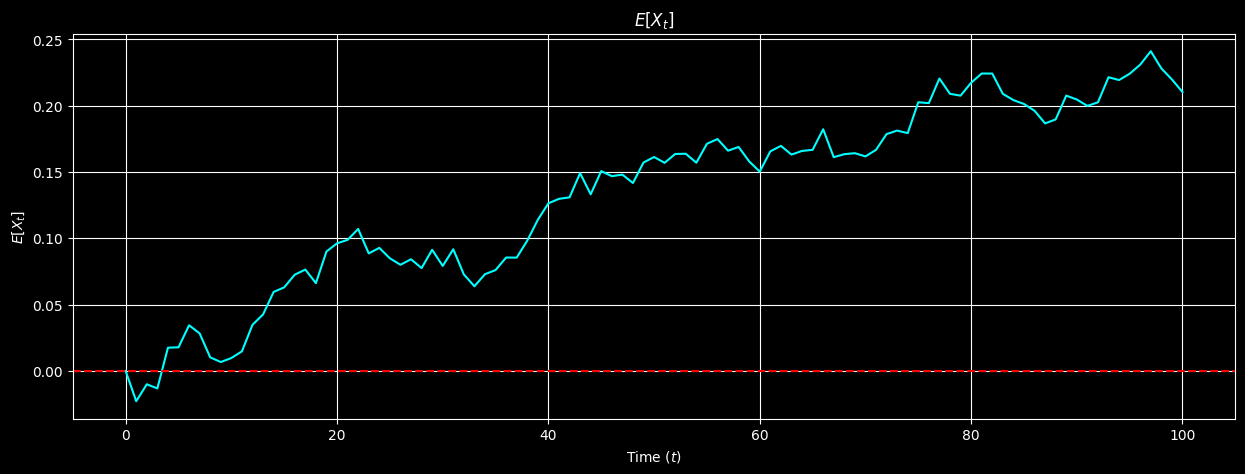

In [53]:
E_X_t = X.mean(axis = 0)
E_X_t

plt.figure(figsize = (15, 5))
plt.plot(E_X_t, color = 'cyan')
plt.axhline(0, color='red', linestyle = '--')
plt.title("$E[X_t]$")
plt.xlabel("Time ($t$)")
plt.ylabel("$E[X_t]$")
plt.grid(True)
plt.show()

### **Variance**

Theory: $\text{Var}[x_t] = \frac{r^2}{1 - a^2}$

**For  $a=1$ and $r=1$**

Substituting with theory $\text{Var}[X_t] = \frac{1^2}{1 - 1^2} = \infty$.

In the simulations, we observe that the estimators for each $t$ explode to infinity. This is because the variance of the random walk accumulates the effect of noise over time.

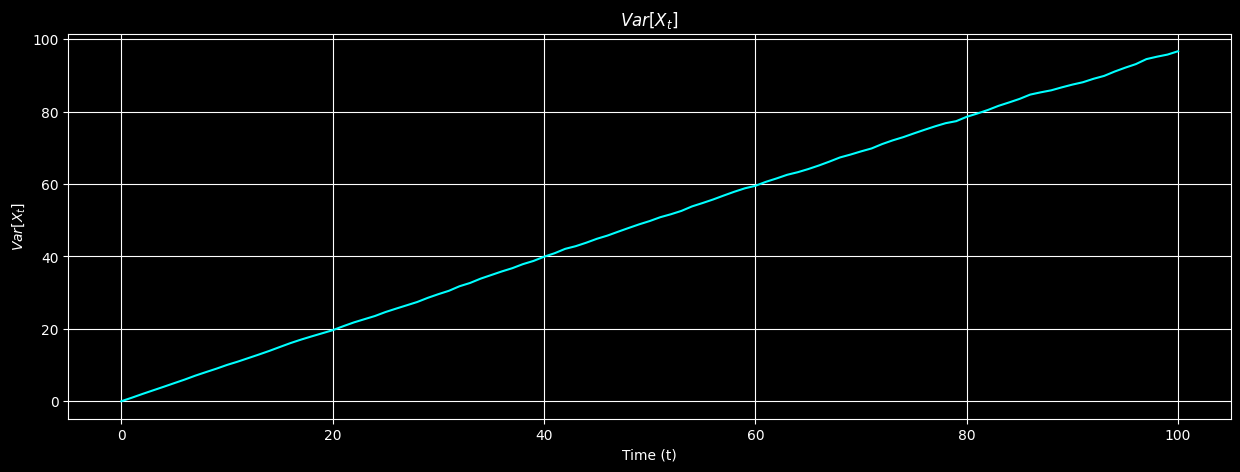

In [54]:
Var_X_t = X.var(axis = 0)
Var_X_t

plt.figure(figsize = (15, 5))
plt.plot(Var_X_t, color = 'cyan')
plt.title("$Var[X_t]$")
plt.xlabel("Time (t)")
plt.ylabel("$Var[X_t]$")
plt.grid(True)
plt.show()

## **It is NOT stationary in the strict sense because its variance increases with time.**

### **Covariance**

Covariance is a measure that indicates the degree to which two variables vary together. If both variables tend to increase or decrease together, the covariance is positive. If one variable tends to increase when the other decreases, the covariance is negative. If the two variables do not show any consistent trend, the covariance is close to zero.

We already expressed it a while ago in the following way:

$Cov[X_t,X_t'] = E[X_tX_t'] - E[X_t]E[X_t']$




By calculating the covariance between  $X_t$ y $X_{t+k}$ (that is, between the time series $t$ and the time series $t + k$), we would be calculating the autocovariance function. This function tells us how the series varies with itself over time.




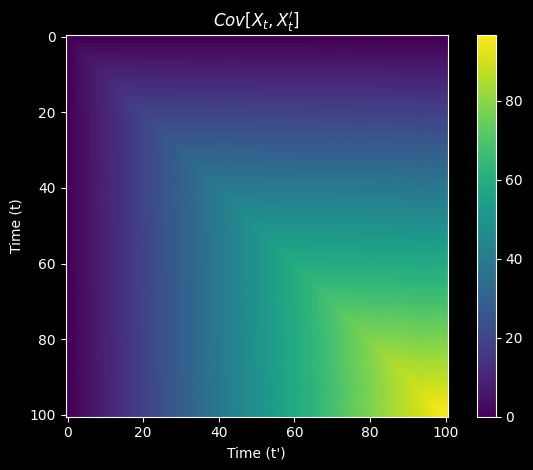

In [55]:
Cov_Xt_y_Xtprima = np.zeros((N, N)) # 101x101

for t in range(N):
    for t_prima in range(N):
        Cov_Xt_y_Xtprima[t, t_prima] = np.mean(X[:, t] * X[:, t_prima]) - np.mean(X[:, t]) * np.mean(X[:, t_prima])

Cov_Xt_y_Xtprima

plt.imshow(Cov_Xt_y_Xtprima, cmap = 'viridis')
plt.colorbar()
plt.title("$Cov[X_t, X_t']$")
plt.xlabel("Time (t')")
plt.ylabel("Time (t)")
plt.tight_layout()
plt.show()

Since $a = 1$ its autocovariance is not constant in time and will increase with the time difference $k$.

## **Simple Random Walk**



---



Consider a simple random walk of the following form:

$x_0=0 \\
x_n = x_{n-1} + z_n$

Where:

$\Omega_{z_n}=\{-1,1\},~~~p(z_n=1)=0.5, ~~~p(z_n=-1)=0.5$



---



### 1. What is the sample space for the random variable $X_n$?

---

$X_0 = \Omega_{X_0} =\{0\}$ \
$X_1 = \Omega_{X_1} = \{-1,0,1\}$ \
$X_2 = \Omega_{X_2} = \{-2,-1,0,1,2\}$ \
$X_n = \Omega_{X_n} = \{-n,-1,...,1,n\}$

### 2. In class we showed that the pmf for a given instant had to do with a binomial. Repeat the process and write the pmf.

---

Binomial Distribution

$Bin_{np}(x) = \binom{n}{x} p^x (1-p)^{n-x}$

Where:
- $x$ = Number of successes in $n$ attempts
- $p$ = Individual probability of success


$pmf(z_n)$ =
\begin{cases}
p & \text{si } z_n = 1 \\
1-p & \text{si } z_n = -1
\end{cases}

### Graph it for some steps: for example for $n=10, n=50, n=100$, although if you can show more moments clearly do so.

---

In [56]:
def random_walk(n):
    # Generates n values ​​of Z following a binomial distribution and converts them to -1 or 1
    z = 2 * np.random.binomial(1, 0.5, n) - 1
    return np.cumsum(z)

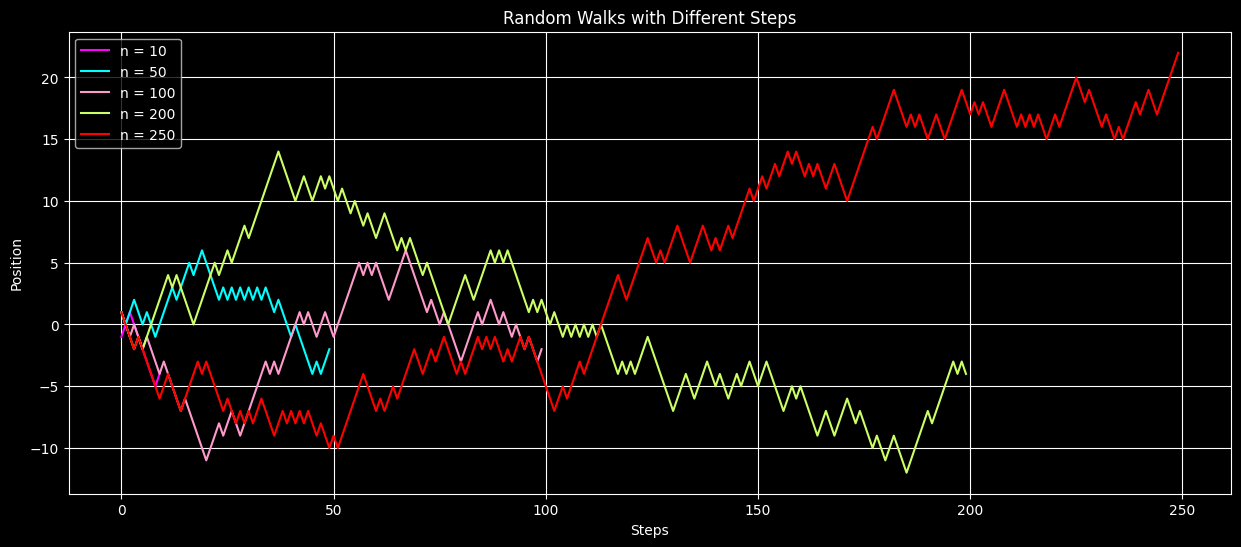

In [57]:
steps = [10, 50, 100, 200, 250]
walks = [random_walk(n) for n in steps]

neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff0000']
plt.figure(figsize = (15, 6))
for i, walk in enumerate(walks):
    plt.plot(walk, label = f'n = {steps[i]}', color = neon_colors[i])

plt.title('Random Walks with Different Steps')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()

### We graph the different Binomial PDFs for the different $n_s$.

---

1. $Bin_{10,0.5}(x) = \binom{10}{x} 0.5^x (1-0.5)^{10-x}$ \
2. $Bin_{50,0.5}(x) = \binom{50}{x} 0.5^x (1-0.5)^{50-x}$ \
3. $Bin_{100,0.5}(x) = \binom{100}{x} 0.5^x (1-0.5)^{100-x}$ \
4. $Bin_{200,0.5}(x) = \binom{200}{x} 0.5^x (1-0.5)^{200-x}$ \
5. $Bin_{250,0.5}(x) = \binom{250}{x} 0.5^x (1-0.5)^{250-x}$

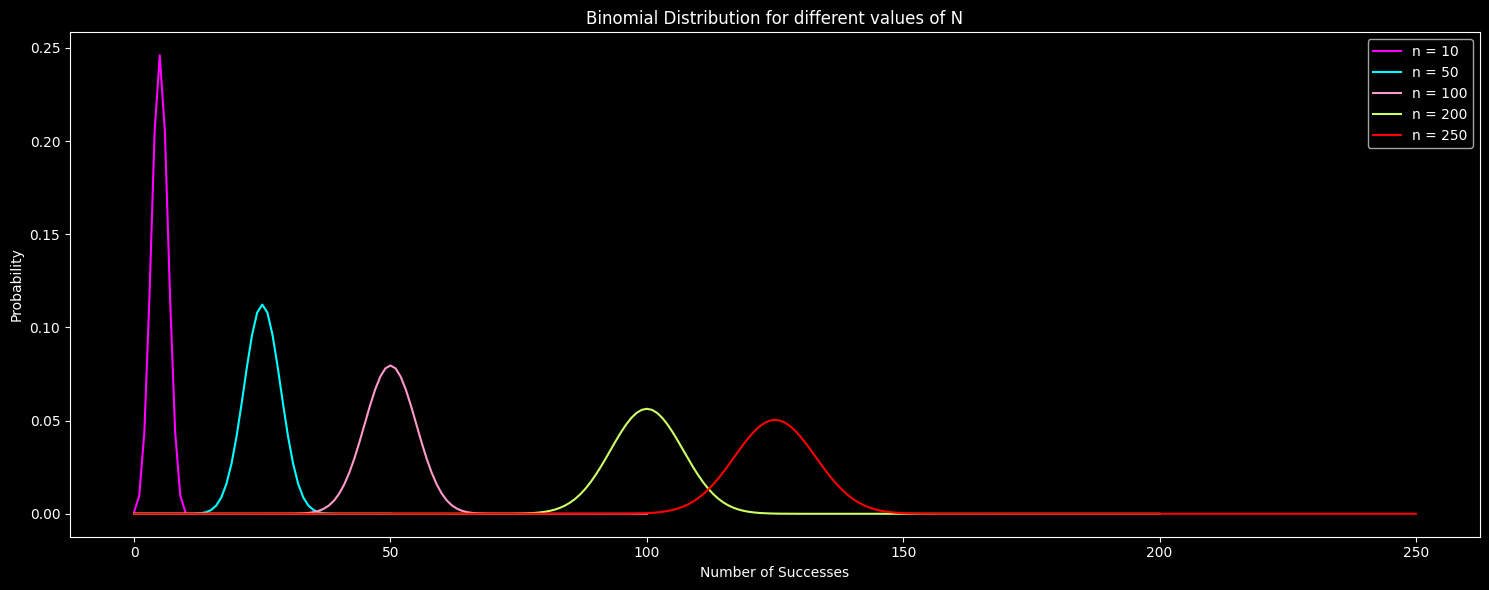

In [61]:
from scipy.stats import binom

fig, ax = plt.subplots(figsize = (15, 6))

for i, n in enumerate(steps):
    x = np.arange(0, n + 1)
    y = binom.pmf(x, n, 0.5)
    ax.plot(x, y, label = f'n = {n}', color = neon_colors[i])

ax.set_title('Binomial Distribution for different values ​​of N')
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Probability')
ax.legend()
plt.tight_layout()
plt.show()

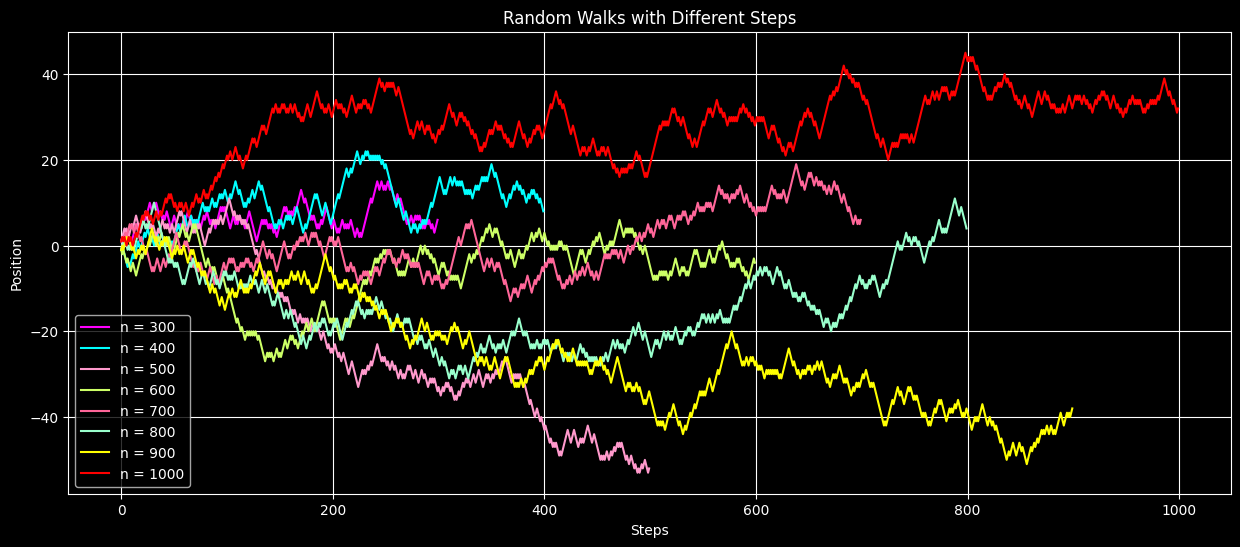

In [62]:
steps = [300, 400, 500, 600, 700, 800, 900, 1000]
walks = [random_walk(n) for n in steps]

neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00', '#ff0000']

plt.figure(figsize = (15, 6))
for i, walk in enumerate(walks):
    plt.plot(walk, label = f'n = {steps[i]}', color = neon_colors[i])

plt.title('Random Walks with Different Steps')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()

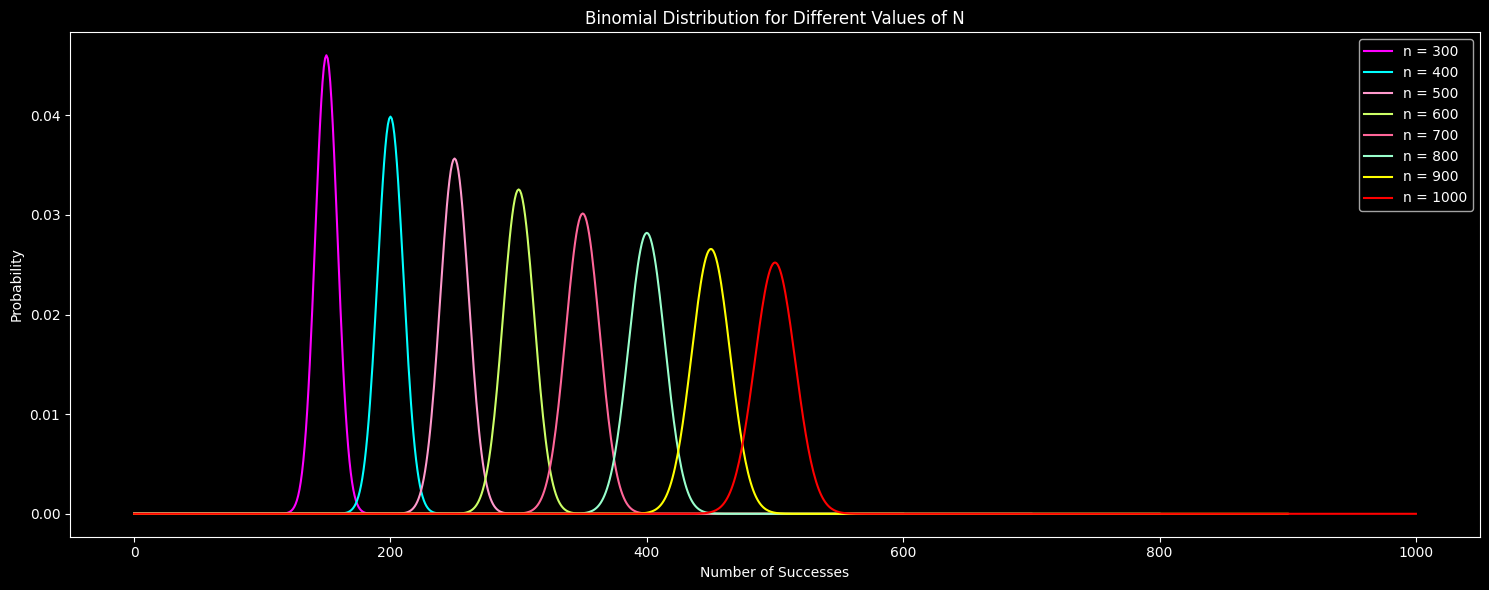

In [63]:
fig, ax = plt.subplots(figsize = (15, 6))

for i, n in enumerate(steps):
    x = np.arange(0, n + 1)
    y = binom.pmf(x, n, 0.5)
    ax.plot(x, y, label = f'n = {n}', color = neon_colors[i])

ax.set_title('Binomial Distribution for Different Values of N')
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Probability')
ax.legend()
plt.tight_layout()
plt.show()

### 3. In class we showed that for large $n$, this distribution tends to a normal one. Write the procedure including the appropriate mean and variance.

---

For n: \
j↑, n-j↓

Position:
$x = j - (n-j) = 2j - n$ \
$j = (0, ..., n)$ 

Being on $x = 2j-n$ is equivalent to having j↑ on $n$ attempts. \
$P(j↑; n, p) = \binom{n}{j} p^j (1-p)^(n-j)$ \
**Apply the Central Limit Theorem**



$E[X] = np$ \
If $X$ ~ $Bin(n, p)$ \
$Var[X] = np(1-p)$ 

Since $p = 0.5$, the equations simplify to:

$E[X] = 0.5n$ \
$Var[X] = 0.25n$

## And according to the Central Limit Theorem...

When $n$ tends to infinity, the binomial distribution tends to a normal distribution with mean $\mu = E[X]$ and standard deviation $\sigma^2 = Var[X]$.

If $n → ∞$
## $Bin(n,p) → N(np, np(1-p))$
## $Bin(n,p) → N(E[X],Var[X])$

### Add this pdf to the graph and discuss how good the correspondence is.

#### We'll say that $N = 1,000,000$

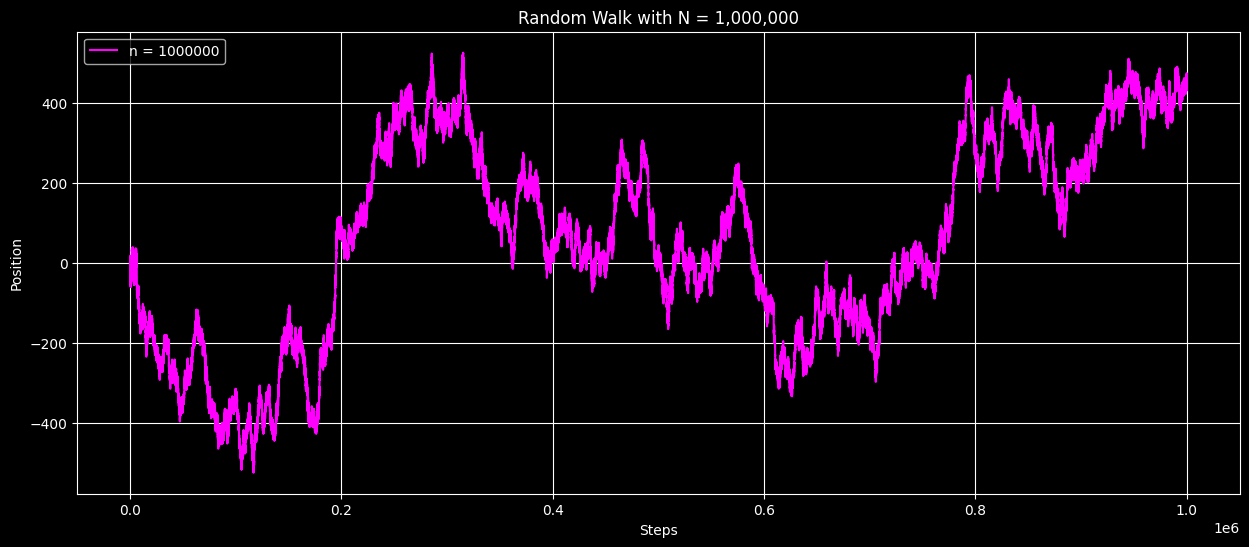

In [64]:
steps = [1000000]
walks = [random_walk(n) for n in steps]

plt.figure(figsize = (15, 6))
for i, walk in enumerate(walks):
    plt.plot(walk, label = f'n = {steps[i]}', color = '#ff00ff')

plt.title('Random Walk with N = 1,000,000')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()

### We will graph this random walk of $N = 1,000,000$ using the Empirical Binomial Distribution, and we will superimpose the Normal Distribution Theoretically, that way we can visually see the CLT.

---

To plot the normal distribution together with the binomial distribution, we need to first calculate the parameters of the normal distribution that is expected to resemble a binomial distribution of parameters $n$ and $p$. The parameters are:

- Mean $\mu$: $n \times p$
- Standard deviation $\sigma$: $\sqrt{n \times p \times (1-p)}$

Since $n = 1,000,000$ and $p = 0.5$, the theoretical normal distribution will have:
- $\mu = 500,000$
- $\sigma = \sqrt{1,000,000 \times 0.5 \times 0.5} = 500$

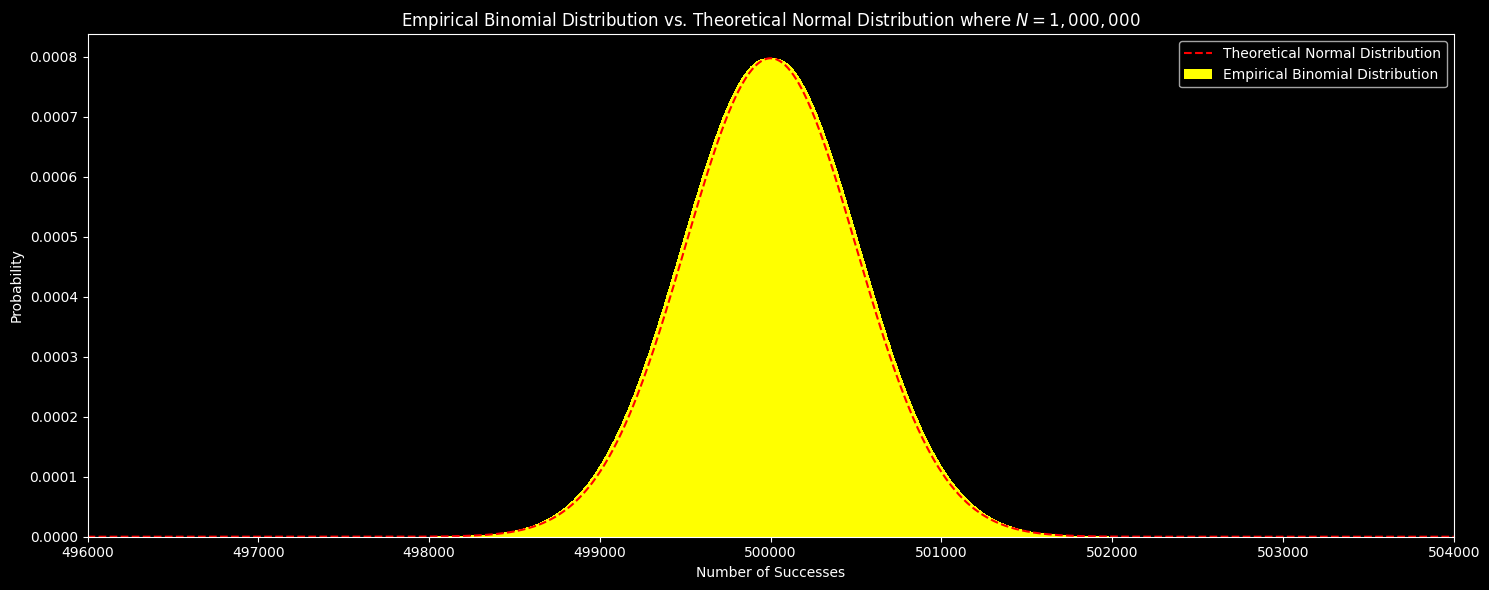

In [65]:
from scipy.stats import norm

n = 1000000
p = 0.5
mu = n * p
sigma = np.sqrt(n * p * (1-p))

x_binom = np.arange(496000, 504000)
y_binom = binom.pmf(x_binom, n, p)


x_norm = np.linspace(496000, 504000, 1000)
y_norm = norm.pdf(x_norm, mu, sigma)

fig, ax = plt.subplots(figsize = (15, 6))

ax.bar(x_binom, y_binom, label = 'Empirical Binomial Distribution', color = '#ffff00', width = 50)
ax.plot(x_norm, y_norm, label = 'Theoretical Normal Distribution', color = '#ff0000', linestyle = '--')

ax.set_title('Empirical Binomial Distribution vs. Theoretical Normal Distribution where $N = 1,000,000$')
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Probability')
ax.legend()
ax.set_xlim(496000, 504000)
plt.tight_layout()
plt.show()

### 4. Simulate $K=10,000$ walks. Illustrates some sample paths.

---

For each walk we will put a maximum of 1000 steps.

In [71]:
def random_walk(n):
    # Generates n values ​​of Z following a binomial distribution and converts them to -1 or 1
    z = 2 * np.random.binomial(1, 0.5, n) - 1
    return np.cumsum(z)

n_steps = 1001
K = 10000

all_walks = [random_walk(n_steps) for _ in range(K)]

sample_indices = np.random.randint(0, K, 20)
sample_walks = [all_walks[i] for i in sample_indices]

In [72]:
neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00', '#ff0000', '#cc00cc', '#00ccff', '#ff9966', '#66ff99', '#cc0099', '#99ccff', '#ffcc00', '#cc0000', '#00ffcc', '#ccff33', '#ff33cc', '#33ccff']

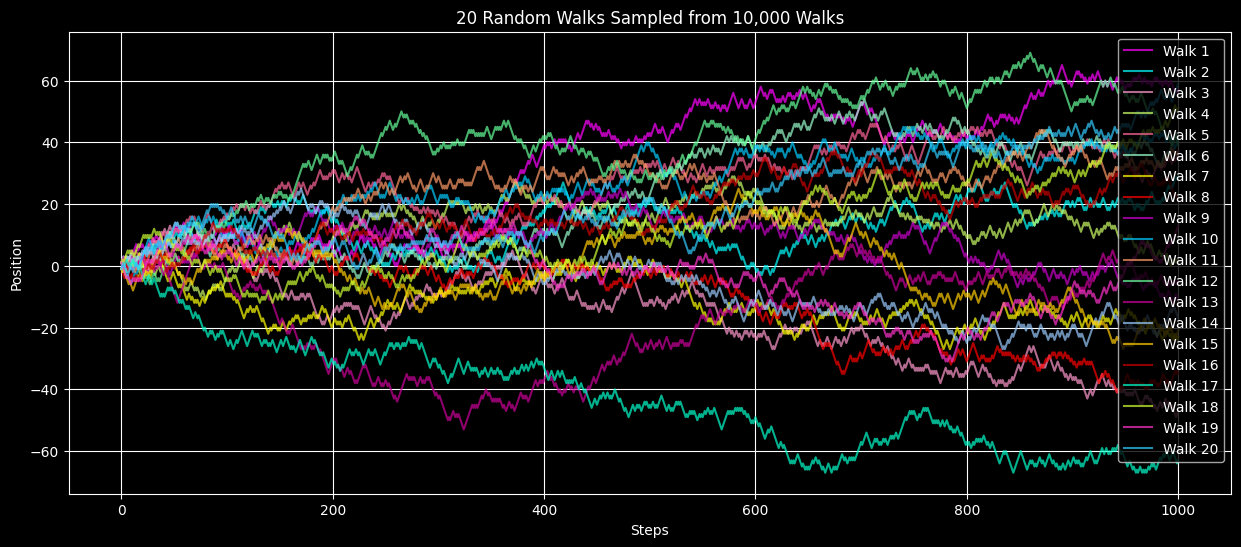

In [73]:
plt.figure(figsize = (15, 6))

for i, walk in enumerate(sample_walks):
    plt.plot(walk, alpha = 0.7, color = neon_colors[i], label = f'Walk {i + 1}')

plt.title('20 Random Walks Sampled from 10,000 Walks')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
plt.show()

### 5. Calculate the histograms for each time step, graph them and compare them with the results obtained theoretically (both binomial and normal).

---

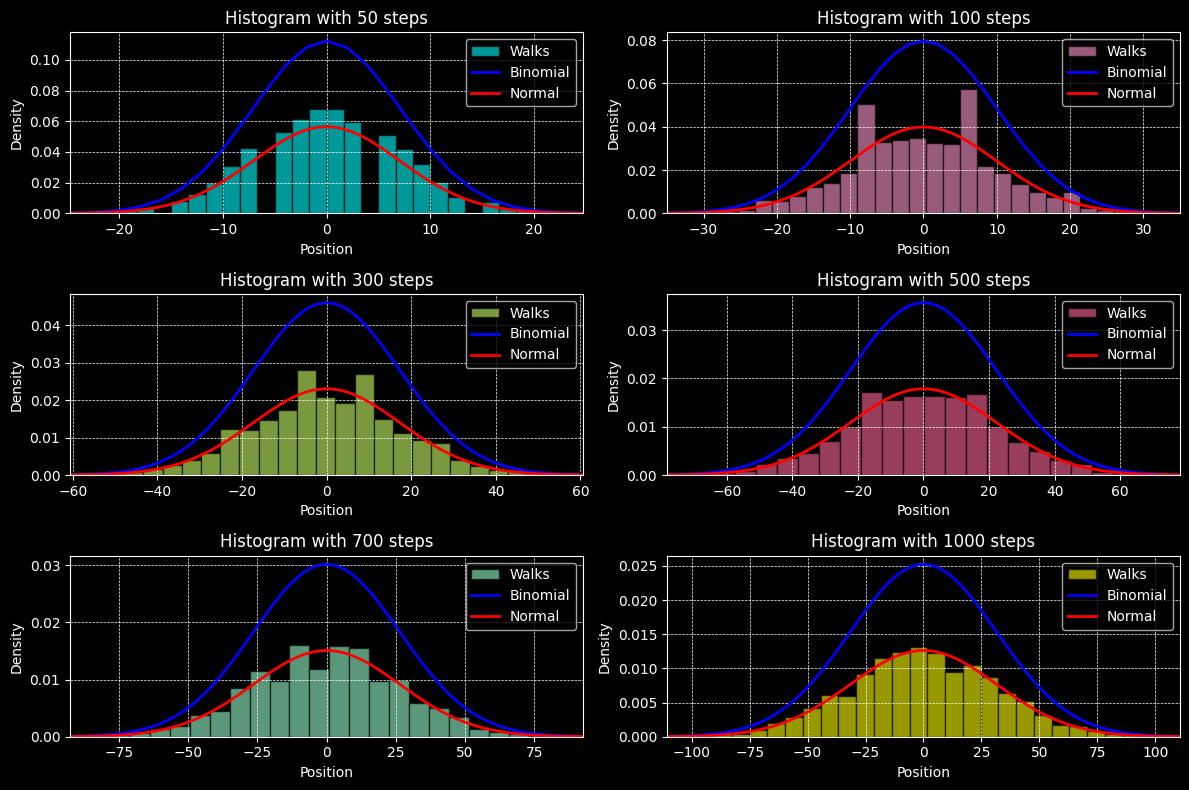

In [82]:
steps2 = [50, 100, 300, 500, 700, 1000]

# We collect positions at times of interest for all walks
positions_at_steps = {step: [walk[step] for walk in all_walks] for step in steps2}

neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00']

p = 0.5

plt.figure(figsize = (12, 8))

for i, step in enumerate(steps2, 1):
    plt.subplot(3, 2, i)
    plt.hist(positions_at_steps[step], bins = 30, density = True, color = neon_colors[i], edgecolor = 'black', alpha = 0.6, label = "Walks")

    # Theoretical Binomial Distribution
    x_binom = 2 * np.arange(0, step + 1) - step
    y_binom = binom.pmf(np.arange(0, step + 1), step, p)
    plt.plot(x_binom, y_binom, color = 'blue', label = 'Binomial', linewidth = 2)

    # Theoretical Normal Distribution
    mu = 0
    sigma = np.sqrt(step)
    x_norm = np.linspace(-step, step, 1000)
    y_norm = norm.pdf(x_norm, mu, sigma)
    plt.plot(x_norm, y_norm, color = 'red', label = 'Normal', linewidth = 2)
    plt.xlim(mu - 3.5*sigma, mu + 3.5*sigma) # Adjust the x-axis range to include a little more than the 3 standard deviations
    
    plt.title(f'Histogram with {step} steps')
    plt.xlabel('Position')
    plt.ylabel('Density')
    plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
    plt.legend()

plt.tight_layout()
plt.show()

### 6. We can think 'times to reach a threshold' (it is not absorption). For random walk, identify the first time the walk reached the following thresholds: $x^*=5, x^*=20$ . Generate an empirical pmf for these times. What do you think would happen if we chose the negatives?

---

In [79]:
thresholds = [5, 20]
times_to_threshold = {x: [] for x in thresholds}

for walk in all_walks:
    for x in thresholds:
        times_to_threshold[x].append(np.where(walk >= x)[0][0] if (walk >= x).any() else np.nan)

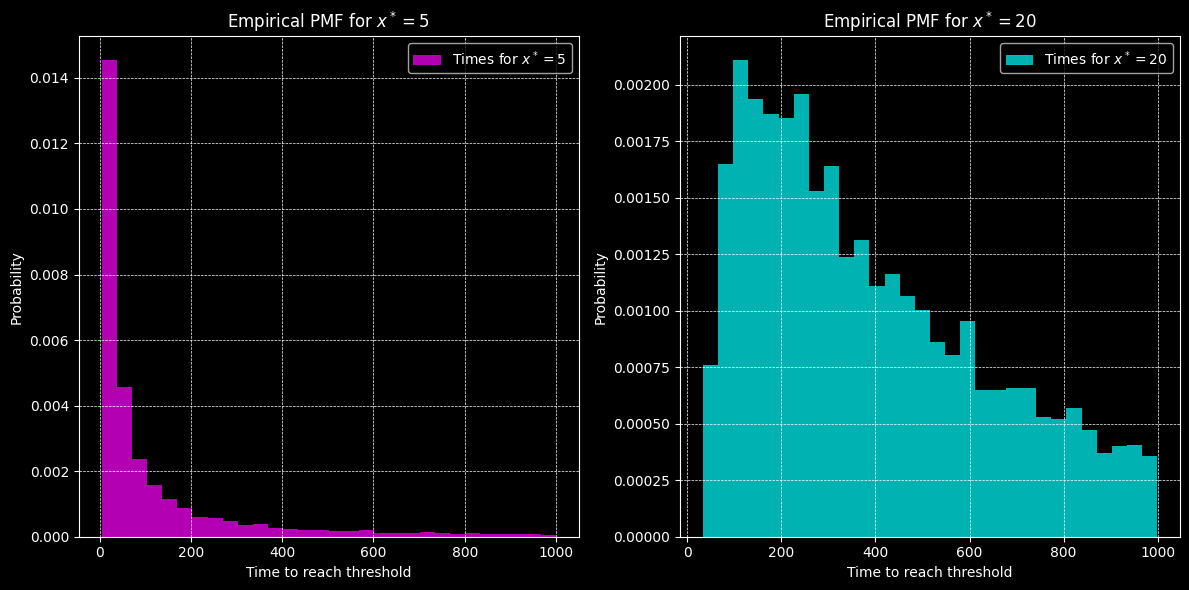

In [80]:
neon_colors_for_thresholds = {'5': '#ff00ff', '20': '#00ffff'}

plt.figure(figsize = (12, 6))

for idx, x in enumerate(thresholds, 1):
    plt.subplot(1, 2, idx)

    valid_times = [time for time in times_to_threshold[x] if not np.isnan(time)]
    plt.hist(valid_times, bins=30, density = True, color = neon_colors_for_thresholds[str(x)], alpha = 0.7, label = f'Times for $x^*={x}$')

    plt.title(f'Empirical PMF for $x^*={x}$')
    plt.xlabel('Time to reach threshold')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.tight_layout()
plt.show()

If we chose negative thresholds,
$x^*= -5$, $x^*= -20$, we would be looking for the first time the walk reaches those values ​​**towards the negative direction.** Since our random walks can move so much towards the positive direction as towards the negative with equal probability (by choosing p = 0.5), **we would expect to see time distributions similar to those for the positive thresholds.** The symmetric nature of the random walk implies that, on average, it would take the same time to reach a positive threshold than its negative counterpart.

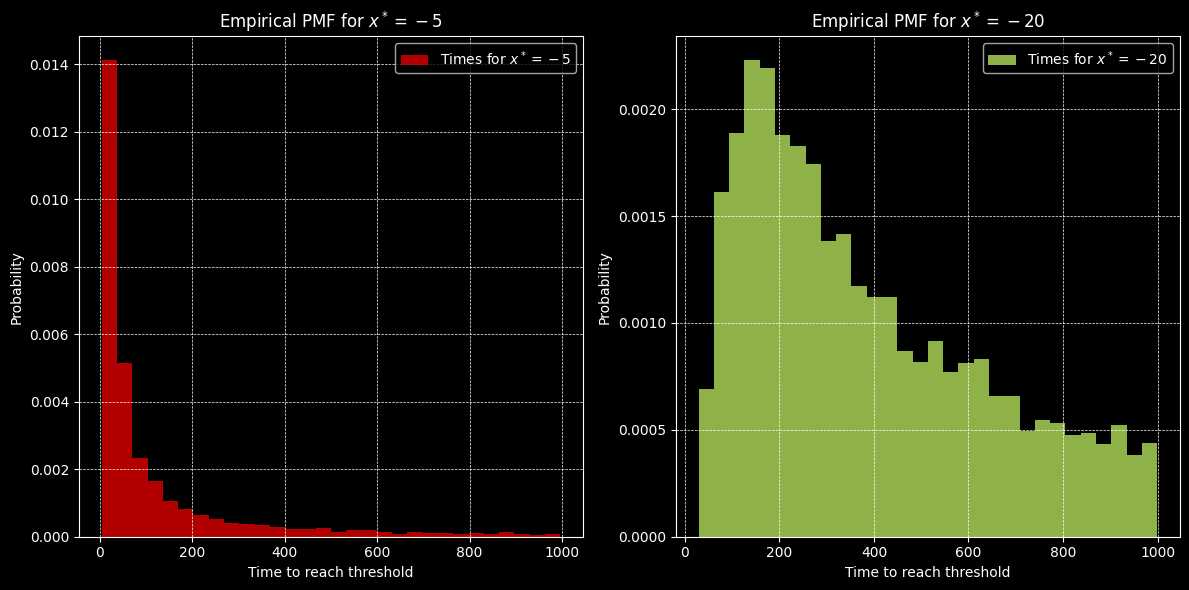

In [81]:
thresholds = [-5, -20]
times_to_threshold = {x: [] for x in thresholds}

# We go from >= x to <= x
for walk in all_walks:
    for x in thresholds:
        times_to_threshold[x].append(np.where(walk <= x)[0][0] if (walk <= x).any() else np.nan)

neon_colors_for_thresholds = {-5: '#ff0000', -20: '#ccff66'}

plt.figure(figsize=(12, 6))
for idx, x in enumerate(thresholds, 1):
    plt.subplot(1, 2, idx)

    valid_times = [time for time in times_to_threshold[x] if not np.isnan(time)]
    plt.hist(valid_times, bins=30, density=True, color=neon_colors_for_thresholds[x], alpha=0.7, label = f'Times for $x^*={x}$')

    plt.title(f'Empirical PMF for $x^*={x}$')
    plt.xlabel('Time to reach threshold')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()